In [2]:
!pip freeze

anyio==3.6.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
astroid==2.11.5
asttokens==2.0.5
attrs==21.4.0
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.0
certifi==2022.5.18.1
cffi==1.15.0
charset-normalizer==2.0.12
click==8.1.3
commonmark==0.9.1
cryptography==37.0.2
cycler==0.11.0
debugpy==1.6.0
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.5.1
docutils==0.18.1
entrypoints==0.4
executing==0.8.3
fastjsonschema==2.15.3
fonttools==4.33.3
idna==3.3
importlib-metadata==4.11.4
importlib-resources==5.7.1
iniconfig==1.1.1
ipdb==0.13.9
ipykernel==6.13.0
ipython==8.3.0
ipython-genutils==0.2.0
isort==5.10.1
jedi==0.18.1
jeepney==0.8.0
Jinja2==3.1.2
joblib==1.1.0
json5==0.9.8
jsonschema==4.5.1
jupyter-client==7.3.1
jupyter-core==4.10.0
jupyter-server==1.17.0
jupyterlab==3.4.2
jupyterlab-pygments==0.2.2
jupyterlab-server==2.14.0
keyring==23.5.1
kiwisolver==1.4.2
lazy-object-proxy==1.7.1
MarkupSafe==2.1.1
matplotlib==3.5.2
matplotlib-inline==0.1.3
mccabe==0.7.0
mistune==0.8.4
nb

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from data_scientist_skills.data import get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = get_data()
data

FileNotFoundError: [Errno 2] No such file or directory: 'data_scientist_skills/raw_data/DataAnalyst.csv'

# make consistent df loading

In [289]:
an_df, sc_df = pd.read_csv("../raw_data/DataAnalyst.csv"), pd.read_csv("../raw_data/DataScientist.csv")

In [290]:
g_df = pd.concat([an_df, sc_df])

In [291]:
g_df = g_df.drop(columns = 'Unnamed: 0')

In [292]:
g_df.columns = [column.replace(' ', '_').lower() for column in g_df.columns]

In [293]:
g_df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,index
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,NaN
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,4375.0
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,4376.0
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,4377.0
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1,4378.0


# How to manage titles?

In [28]:
len(g_df.job_title.unique())

3014

In [29]:
len(g_df.job_title)

6162

In [47]:
job_title_list = g_df.job_title.unique()

In [63]:
jb_title = pd.DataFrame({'title':job_title_list})

In [64]:
jb_title

,title
0,"Data Analyst, Center on Immigration and Justic..."
1,Quality Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team..."
3,Data Analyst
4,Reporting Data Analyst
...,...
3009,Senior Data Engineer (Data ELT/ETL Engineer)
3010,Columbus Data Science Tutor Jobs
3011,Cyber Security Data Engineer
3012,Security Analytics Data Engineer


In [95]:
counts = pd.DataFrame(g_df.job_title.value_counts())
counts.rename(columns = {'job_title':'counts'}, inplace = True)

In [86]:
counts

,counts
Data Analyst,651
Data Scientist,274
Data Engineer,260
Senior Data Analyst,137
Senior Data Scientist,91
...,...
"Data Analyst 3, Customer Experience - Centennial",1
Senior Health Data Analyst (SAS),1
ColdFusion Development Data Analyst -Remote,1
RQS - IHHA - 201900004460 -1s Data Security Analyst,1


In [96]:
counts['titles'] = counts.index

In [97]:
counts.reset_index(inplace = True)
counts.drop(columns = 'index', inplace = True)

In [108]:
counts.keys

<bound method NDFrame.keys of       counts                                             titles
0        651                                       Data Analyst
1        274                                     Data Scientist
2        260                                      Data Engineer
3        137                                Senior Data Analyst
4         91                              Senior Data Scientist
...      ...                                                ...
3009       1   Data Analyst 3, Customer Experience - Centennial
3010       1                   Senior Health Data Analyst (SAS)
3011       1        ColdFusion Development Data Analyst -Remote
3012       1  RQS - IHHA - 201900004460 -1s Data Security An...
3013       1  Patient Safety Physician or Safety Scientist -...

[3014 rows x 2 columns]>

In [114]:
len(counts[counts['counts'] == 1])

2311

In [115]:
len(counts[counts['counts'] > 10])

34

In [120]:
sum(counts[counts['counts'] > 3].counts)

2652

<BarContainer object of 3014 artists>

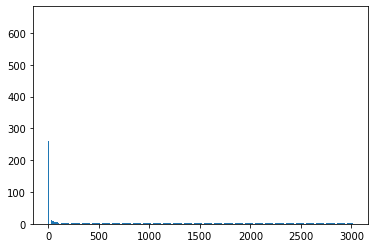

In [110]:
plt.bar(height = counts['counts'], x = counts.index)

In [ ]:
plt.hist(counts.counts)

# Salaries

In [294]:
salary = g_df['salary_estimate']

In [295]:
salary

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
3904    $55K-$112K (Glassdoor est.)
3905    $55K-$112K (Glassdoor est.)
3906    $55K-$112K (Glassdoor est.)
3907    $55K-$112K (Glassdoor est.)
3908    $55K-$112K (Glassdoor est.)
Name: salary_estimate, Length: 6162, dtype: object

In [254]:
salary = salary.apply(lambda x: x.replace('K', ''))\
            .apply(lambda x: x.replace('$', ''))\
            .apply(lambda x: x.replace('(Glassdoor est.)', ''))

salary = salary.str.split("-", expand = True)

salary = salary.apply(lambda x: x.replace('', '0'))
salary[1] = salary[1].apply(lambda x: x.replace('(Employer est.)', ''))\
                     .apply(lambda x: x.replace(' Per Hour', '-*'))

salary[[1,'flag']] = salary[1].str.split("-", expand = True)

salary[[0,1]] = salary[[0,1]].astype(int)

salary.loc[salary.flag == '*', [0,1]] = salary.loc[salary.flag == '*', [0,1]]*40*52/1000
salary['mean'] = (salary[0] + salary[1]) / 2

In [ ]:
#salary.drop(columns = 'flag', inplace = True)

In [298]:
def process_salary_range(dataframe, only_mean = True):
    """Inteprets the salary_range string; Returns the mean of the range.
    Returned values are in units of 1k. If the string contains ' Per Hour', the
    salary will be calculated as 40hours/week, 52weeks/year. If only_mean is set
    to False, the returned DataFrame will include the low and high of the range
    as separate columns.                                            
    """
    salary = dataframe['salary_estimate']
    temp_df = dataframe.copy()
    
    #removes extra characters
    salary = salary.apply(lambda x: x.replace('K', ''))\
            .apply(lambda x: x.replace('$', ''))\
            .apply(lambda x: x.replace('(Glassdoor est.)', ''))\
            .apply(lambda x: x.replace('(Employer est.)', ''))
            
    #splits into a low and high column
    salary = salary.str.split("-", expand = True)
    salary.rename(columns = {0:'low', 1:'high'}, inplace = True)

    #fills in the empty values
    salary = salary.apply(lambda x: x.replace('', '0'))
    
    #removes the ' Per Hour' string and adds a flag
    salary['high'] = salary['high'].apply(lambda x: x.replace(' Per Hour', '-*'))
    salary[['high','flag']] = salary['high'].str.split("-", expand = True)

    #casts values to numerical
    salary[['low','high']] = salary[['low','high']].astype(int)

    #converts the hourly wages to a yearly salary
    salary.loc[salary.flag == '*', ['low','high']] = salary.loc[salary.flag == '*', ['low','high']]*40*52/1000
    
    #creates the mean column
    salary['mean'] = (salary['low'] + salary['high']) / 2
    
    #dropping unwanted columns
    to_drop = ['flag']
    if only_mean:
        to_drop.extend(['low','high'])
    
    salary.drop(columns = to_drop, inplace = True)
    temp_df = temp_df.join(salary)
    temp_df.drop(columns = 'salary_estimate', inplace = True)
    
    return temp_df

In [303]:
process_salary_range(g_df)

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,index,mean
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,NaN,51.5
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,NaN,146.0
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0.0,51.5
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0.0,146.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,4375.0,83.5
3905,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,4376.0,83.5
3906,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,4377.0,83.5
3907,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1,4378.0,83.5


In [251]:
salary[salary['flag'] == '*']

,0,1,flag
685,70.72,110.24,*
686,70.72,110.24,*
687,70.72,110.24,*
688,70.72,110.24,*
689,70.72,110.24,*
690,70.72,110.24,*
691,70.72,110.24,*
1295,20.80,54.08,*
1296,20.80,54.08,*
1297,20.80,54.08,*


In [231]:
salary.loc[salary.flag == '*', [0,1]]

,0,1
685,70.72,110.24
686,70.72,110.24
687,70.72,110.24
688,70.72,110.24
689,70.72,110.24
690,70.72,110.24
691,70.72,110.24
1295,20.80,54.08
1296,20.80,54.08
1297,20.80,54.08


In [236]:
# # f = lambda x: int(round(x))
# salary.loc[salary.flag == '*',0] = salary.loc[salary.flag == '*',0].apply(lambda x: round(x))
# salary.loc[salary.flag == '*',1] = salary.loc[salary.flag == '*',1].apply(lambda x: round(x))
# salary.loc[salary.flag == '*']

,0,1,flag
685,71.0,110.0,*
686,71.0,110.0,*
687,71.0,110.0,*
688,71.0,110.0,*
689,71.0,110.0,*
690,71.0,110.0,*
691,71.0,110.0,*
1295,21.0,54.0,*
1296,21.0,54.0,*
1297,21.0,54.0,*


In [255]:
to_drop = ['low','high','flag']

In [262]:
salary.drop(columns = '')

,0,1,flag,mean
0,37.0,66.0,None,51.5
1,37.0,66.0,None,51.5
2,37.0,66.0,None,51.5
3,37.0,66.0,None,51.5
4,37.0,66.0,None,51.5
...,...,...,...,...
3904,55.0,112.0,None,83.5
3905,55.0,112.0,None,83.5
3906,55.0,112.0,None,83.5
3907,55.0,112.0,None,83.5


In [113]:
#used when testing for problem values
# i = 0
# for value in salary.values:
#     try:
#         value.astype('int')
#     except:
#         print(value)
#         i +=1
        
# print(i)

['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['34' '53 Per Hour']
['10' '26 Per Hour']
['10' '26 Per Hour']
['10' '26 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
['17' '27 Per Hour']
21


In [ ]:
salary = salary.astype('int')

In [103]:
salary = salary.apply(lambda x: x * 1000)

In [108]:
salary[salary[0] == 0]

,0,1
2149,0,1000


In [90]:
# salary.applymap(lambda x: int(x))
# astype()


In [102]:
salary.dtypes

0    int64
1    int64
dtype: object

## following up on the per hours

In [116]:
for est in g_df["salary_estimate"]:
    if 'Per Hour' in est:
        print(est)

$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$34-$53 Per Hour(Glassdoor est.)
$10-$26 Per Hour(Glassdoor est.)
$10-$26 Per Hour(Glassdoor est.)
$10-$26 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)
$17-$27 Per Hour(Glassdoor est.)


In [134]:
temp_df = g_df[g_df["salary_estimate"].str.contains('Per Hour')]

In [135]:
temp_df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,index
685,"Clinical Laboratory Scientist, Per Diem",$34-$53 Per Hour(Glassdoor est.),"As the Clinical Laboratory Scientist, you will...",3.8,UC Davis Medical Center\n3.8,"Los Angeles, CA","Sacramento, CA",10000+ employees,-1,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,793.0
686,Sr. Data Analyst,$34-$53 Per Hour(Glassdoor est.),"As a Sr. Data Analyst, you will work closely w...",2.8,SAG-AFTRA Health Plan and SAG-Producers Pensio...,"Burbank, CA","Burbank, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,794.0
687,"Lead Data Science Instructor, Data Scientist",$34-$53 Per Hour(Glassdoor est.),Job Description\nGalvanize is a dynamic learni...,-1.0,Galvanize Inc.,"Los Angeles, CA","Harrisburg, NC",51 to 200 employees,-1,Company - Private,Construction,"Construction, Repair & Maintenance",Unknown / Non-Applicable,-1,-1,795.0
688,"Clinical Laboratory Scientist (Per Diem, Varia...",$34-$53 Per Hour(Glassdoor est.),"Monterey Park Hospital, located in the San Gab...",3.0,AHMC Healthcare\n3.0,"Monterey Park, CA","Alhambra, CA",5001 to 10000 employees,1998,Company - Private,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1,796.0
689,Data Engineer,$34-$53 Per Hour(Glassdoor est.),Responsibilities:* Responsible for building an...,-1.0,BlackLine Systems,"Woodland Hills, CA","Markham, Canada",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,-1,797.0
690,Clinical Laboratory Scientist - Generalist,$34-$53 Per Hour(Glassdoor est.),LGC Labs is the trusted partner in laboratory ...,3.8,LetsGetChecked\n3.8,"Monrovia, CA","New York, NY",51 to 200 employees,2015,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,798.0
691,"Clinical Laboratory Scientist , Med Tech",$34-$53 Per Hour(Glassdoor est.),Job Overview:\n\n\nCovance is looking for a Cl...,3.4,Covance\n3.4,"Los Angeles, CA","Burlington, NC",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),"PRA Health Sciences, PPD, IQVIA",-1,799.0
1295,Stafford Data Science Tutor Jobs,$10-$26 Per Hour(Glassdoor est.),#Stafford Data Science Tutor Jobs\n\nVarsity T...,4.2,Varsity Tutors\n4.2,"Stafford, TX","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,1440.0
1296,Spring Data Science Tutor Jobs,$10-$26 Per Hour(Glassdoor est.),#Spring Data Science Tutor Jobs\n\nVarsity Tut...,4.2,Varsity Tutors\n4.2,"Spring, TX","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,1441.0
1297,Sugar Land Data Science Tutor Jobs,$10-$26 Per Hour(Glassdoor est.),#Sugar Land Data Science Tutor Jobs\n\nVarsity...,4.2,Varsity Tutors\n4.2,"Sugar Land, TX","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,1442.0


In [138]:
len(temp_df.company_name.unique())

19

In [141]:
 per_hour_jd = [jd for jd in temp_df.job_description]

In [39]:
print(per_hour_jd[6])

NameError: name 'per_hour_jd' is not defined

# Salaries from 0

In [34]:
def get_data():
    #Get data
    df1 = pd.read_csv("../raw_data/DataAnalyst.csv")
    df2 = pd.read_csv("../raw_data/DataScientist.csv")
    #Concat to full dataframe
    df = pd.concat([df1, df2], ignore_index=True, axis=0)
    #Drop columns and reformat names
    df.drop(columns=['Unnamed: 0', 'index', 'Revenue', 'Competitors', 'Easy Apply'], inplace=True)
    df.columns = [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [41]:
df = get_data()
df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"
...,...,...,...,...,...,...,...,...,...,...,...,...
6157,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology
6158,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology
6159,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services
6160,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal


In [33]:
# temp = df[df['salary_estimate'].str.contains('(Employer est.)')]
# temp = temp.salary_estimate
# temp = temp.apply(lambda x: x.replace('K', ''))\
#         .apply(lambda x: x.replace('$', ''))\
#         .apply(lambda x: x.replace('(Glassdoor est.)', ''))\
#         .apply(lambda x: x.replace('(Employer est.)', ''))
# temp = temp.str.split("-", expand = True)
# pd.DataFrame(temp)

/tmp/ipykernel_8074/2338417829.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  temp = df[df['salary_estimate'].str.contains('(Employer est.)')]


,0,1
5233,200,250
5234,200,250
5235,200,250
5236,200,250
5237,200,250
5238,200,250
5239,200,250
5240,200,250
5241,200,250
5242,200,250


In [42]:
def process_salary_estimate(dataframe, only_mean = True):
    """Inteprets the salary_estimate string; Returns the mean of the range.
    Returned values are in units of 1k. If the string contains ' Per Hour', the
    salary will be calculated as 40hours/week, 52weeks/year. If only_mean is set
    to False, the returned DataFrame will include the low and high of the range
    as separate columns.                                            
    """
    salary = dataframe['salary_estimate']
    temp_df = dataframe.copy()
    
    #removes extra characters  ### This section needs to be written handle salary ranges dynamically -JP
    salary = salary.apply(lambda x: x.replace('K', ''))\
            .apply(lambda x: x.replace('$', ''))\
            .apply(lambda x: x.replace('(Glassdoor est.)', ''))\
            .apply(lambda x: x.replace('(Employer est.)', ''))
            
    #splits into a low and high column
    salary = salary.str.split("-", expand = True)
    salary.rename(columns = {0:'low', 1:'high'}, inplace = True)

    #fills in the empty values, some lows are blank
    salary = salary.apply(lambda x: x.replace('', '0'))
    
    #removes the ' Per Hour' string and adds a flag  ### Dynamic version would check for any mention of 'hour'/'hr' -JP
    salary['high'] = salary['high'].apply(lambda x: x.replace(' Per Hour', '-*'))
    salary[['high','flag']] = salary['high'].str.split("-", expand = True)

    #casts values to numerical
    salary[['low','high']] = salary[['low','high']].astype(int)

    #converts the hourly wages to a yearly salary  ### There is a better way than my assumptions here -JP
    salary.loc[salary.flag == '*', ['low','high']] = salary.loc[salary.flag == '*', ['low','high']]*40*52/1000
    
    #creates the mean column
    salary['mean'] = (salary['low'] + salary['high']) / 2
    
    #dropping unwanted columns
    to_drop = ['flag']
    if only_mean:
        to_drop.extend(['low','high'])
    
    salary.drop(columns = to_drop, inplace = True)
    temp_df = temp_df.join(salary)
    temp_df.drop(columns = 'salary_estimate', inplace = True)
    
    return temp_df

In [43]:
process_salary_range(df)

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,mean
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,51.5
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,51.5
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",51.5
...,...,...,...,...,...,...,...,...,...,...,...,...
6157,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,83.5
6158,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,83.5
6159,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,83.5
6160,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,83.5


In [40]:
df.job_description[5]

'About Cubist\nCubist Systematic Strategies is one of the world’s premier investment firms. The firm deploys systematic, computer-driven trading strategies across multiple liquid asset classes, including equities, futures and foreign exchange. The core of our effort is rigorous research into a wide range of market anomalies, fueled by our unparalleled access to a wide range of publicly available data sources.\nJob Description\nWe are passionate about data. We collaborate to build elegant, effective, scalable and highly reliable solutions to empower predictive modelling in finance.\nCubist’s Data Services group is looking for a Data Analyst to join our dedicated team. Our group is responsible for the timely delivery of comprehensive and error-free data to some of the most demanding and successful systematic Portfolio Managers in the world.\nThis exceptional individual will be a member of a small team of Data Scientists/Analysts who play a vital role in ensuring the smooth day-to-day imp

# Next topic